# 카메라 스티커앱 만들기

## 왕관 씌우기

In [1]:
#opencv와 matplotlib을 읽어옵니다.

import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib
print("🌫🛸")

🌫🛸


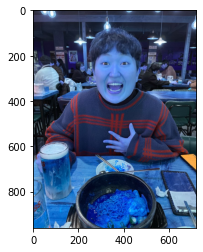

In [2]:
#준비한 이미기 읽기
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image.png'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 불러오기
img_show = img_bgr.copy()              # 출력 이미지 보관
plt.imshow(img_bgr)
plt.show()

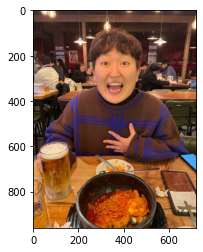

In [3]:
#opencv로 푸르게 출력된 사진을 다른 라이브러리를 활용하여 출력
# plt.imshow 이전에 RGB 이미지로 바꿈
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [4]:
# dlib을 활용, detector 선언
detector_hog = dlib.get_frontal_face_detector()
print("🌫🛸")

🌫🛸


In [5]:
# detector_hog를 이용해서 얼굴의 bounding box 추출
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("🌫🛸")

🌫🛸


rectangles[[(262, 201) (448, 387)]]


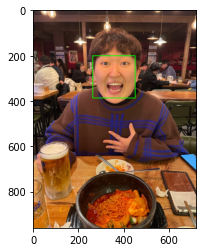

In [6]:
# 찾은 얼굴 영역 박스 리스트
#dlib.rectangle 객체는 left(), top(), right(), bottom(), height(), width() 등의 멤버함수를 포함
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [7]:
# 저장한 landmark 모델을 불러옴
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")
#landmark_predictor는 RGB 이미지와 dlib.rectangle을 입력 받아 dlib.full_object_detection을 반환

🌫🛸


In [8]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# points는 객체이기 때문에 parts() 함수로 개별 위치에 접근 가능
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


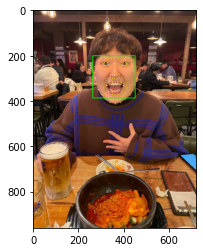

In [9]:
#랜드마크 출력
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [10]:
# 좌표 확인
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))
    
# 얼굴 이미지에서 코의 중심점이 (358, 286)

(358, 286)
(x,y) : (358,193)
(w,h) : (187,187)


In [11]:
# 왕관 이미지 resize
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/king.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(187, 187, 3)


In [12]:
refined_x = x - w // 2
refined_y = y - h
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))
# 내 사진에서는 음수로 나오지 않았다

(x,y) : (265,6)


In [13]:
#하지만 다른 사진을 적용하야하니
#x좌표와 y좌표를 경우에 맞춰 원본 이미지의 경계 값으로 수정
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (265,6)


In [14]:
#이미지에 스티커 적용
#img_show[from:to] 형식입니다
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
print("슝~")

슝~


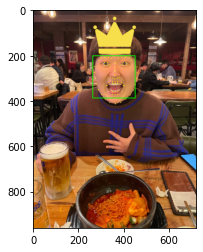

In [15]:
#결과 이미지 출력
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

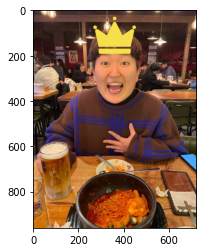

In [16]:
#bounding box와 landmark를 제거 최종 결과 출력
#imh_bgr 활용
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## 고양이 수염 적용

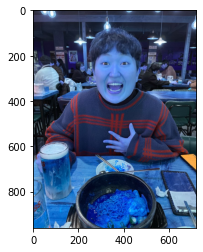

In [17]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image.png'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지
img_show = img_bgr.copy()              # 출력 이미지 보관
plt.imshow(img_bgr)
plt.show()

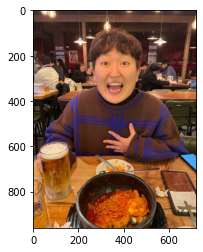

In [18]:
#RGB 이미지로 바꿈 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [19]:
# detector 선언
detector_hog = dlib.get_frontal_face_detector()
print("🌫🛸")

🌫🛸


In [20]:
#img_rgb 활용, bounding box 추출
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("🌫🛸")

🌫🛸


rectangles[[(262, 201) (448, 387)]]


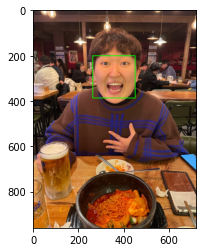

In [21]:
# 찾은 얼굴 영역 박스 리스트
#dlib.rectangle 객체는 left(), top(), right(), bottom(), height(), width() 등의 멤버함수를 포함
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [22]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


In [23]:
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


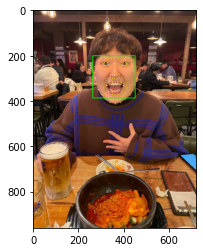

In [24]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [25]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[33]) # 코의 index는 33 입니다
    x = landmark[33][0]
    y = landmark[33][1]
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(358, 302)
(x,y) : (358,302)
(w,h) : (187,187)


In [26]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png'  #스티커 이미지 경로
img_sticker = cv2.imread(sticker_path)       # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h)) # 이미지 resize
print (img_sticker.shape)

(187, 187, 3)


libpng warning: Incorrect bKGD chunk length


In [27]:
# 좌표의 가운데와 일치하도록
refined_x = x - w // 2   #left
refined_y = y - h // 2  #top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (265,209)


In [28]:
# 값이 음수로 나올 경우 원본 이미지의 경계 값으로 수정
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (265,209)


In [29]:
#원본 이미지에 스티커 적용
#img_show[from:to] 
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
print("슝~")

슝~


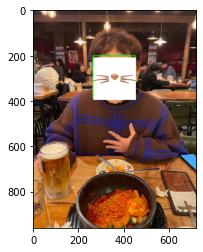

In [30]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

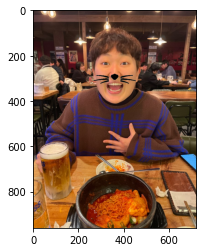

In [31]:
#스티커 이미지 배경 없애기
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
# 참고 https://ceuity.tistory.com/7

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## 회고

### 프로젝트가 점점 더 어려워지기 시작한다. 혼자서 해내야할 것들이 많아지고 구글링을 해도 찾기 어려워지는 것들이 많아졌다. 짜여진 코드를 봐도 나의 프로젝트에서는 에러가 뜨고 적용이 되지 않으며 의자에 엉덩이를 붙이고 앉아서 하루종일 머리를 뜯어야 하나를 성공하고, 성공하면 또 다른 벽에 부딪히는 일상이 반복이다.

### 인공지능이라는 아이는 진짜 대단한 아이다. 내 눈, 코, 입, 얼굴이 어디에 있는지 어떻게 바로 찾아내는 걸까?
### 이번 프로젝트에서는 OpenCV, cv2, np.where 등을 알게 되었는데 고양이 수염 이미지의 배경을 지우는 것에 어려움이 있긴 했지만 함수 하나로 고양이 수염만 딱. 나타나질 수도 있다는 것을 배웠다. 

### 루브릭 평가 기준에 맞추기 위해_수염이 코 위에 없고 이상한 곳에 적용이 되어서  좌표를 맞추기 위해 x, y 를 바꿔가면서 코 중간으로 맞추는 것을 성공했다. 수염 배경을 지우기 위해 구글링을 계속 하면서 cv2, np.where 을 검색하다가 숫자 하나가 문제였다는 것을 알게 된 후로 진짜 코드 짤 때는 숫자 하나가 너무 소중하고 중요한 존재구나. 라는 것을 다시 한번 느끼고 집중해야겠다는 생각을 했다.

### (각도, 밝기, 촬영거리) 시도해보고 싶었으나 제출 기한이 다 되어버려서 시도하지 못했습니다. 그래서 평가기준에 도달하기 위한 시도는 제출 후에 시도해볼 예정입니다.

### 남는 시간을 잘 활용하자. 시간을 알맞게 잘 쓰자. 혼자만 힘든거 아니다. 혼자만 피곤한 것도 아니다. 조금이라도 더 앉아있고, 조금 더 찾고, 조금 더 검색하자.

